# Importaciones preliminares

In [153]:
import warnings
from src.ReMasFrame import ReMasFrame
warnings.filterwarnings("ignore")
import numpy as np
import descarteslabs as dl

# 

In [94]:
# Definir número de km para el box
km = 10

In [95]:
def get_ids(products, cat):
    """
    Obtiene el id de los productos 'products' dada una categoria 'cat'
    """
    dictio = products[cat]
    return [dictio[key]["id"] for key in dictio]

In [96]:
# Crear instancia ReMasFrame
remas = ReMasFrame()
# Crear wheather
wheather = get_ids(remas.get_products(), "weather")
# Crear segunda instancia que use boxes
remas2 = remas.create_box(km)

In [127]:
# Buscar escenas
scenes, ctx = remas.search_scenes(polygons=remas2.geometry.values[0],
                                  product_ids=wheather)

In [98]:
scenes

SceneCollection of 10 scenes
  * Dates: Jan 01, 1981 to Jan 10, 1981
  * Products: chirps:daily:v1: 10

# Obtener productos

In [129]:
# Obtener los productos de remas
products = remas.get_products()
# products

In [110]:
# Cuales son las llaves de los productos
products.keys()

dict_keys(['weather', 'soil_moist', 'elevation', 'population'])

In [174]:
# Obtener un producto en particular
p = products["weather"]
# p

In [175]:
# Cuales son las llaves del producto
p.keys()

dict_keys(['goes', 'gsod', 'chirps', 'cfs'])

In [176]:
# Obtener un producto
p_ = p["gsod"]
p_

{'name': 'GSOD Daily Interpolation Weather Product',
 'id': 'daily-weather:gsod-interpolated:v0',
 'res': '10km',
 'bands': ['tavg', 'tmax', 'tmin', 'rh', 'prec'],
 'descrip': 'interpolated raster from 1980-01-01 for geographical area from -180 deg to 180 deg longitude, and from -60 to 60 deg latitude.'}

In [177]:
# Obtener las escenas del producto
scenes, ctx = remas.search_scenes(polygons=remas2.geometry.values[0],
                                  product_ids=[p_["id"]])
scenes, ctx

(SceneCollection of 10 scenes
   * Dates: Jan 01, 1999 to Jan 10, 1999
   * Products: daily-weather:gsod-interpolated:v0: 10,
 AOI(geometry=<shapely.geom...x7f78726b5110>,
     resolution=0.08333333333333,
     crs='+proj=latlon...GS84 +no_defs',
     align_pixels=True,
     bounds=(107.34351703986678, 32.472325344123774, 107.55648296013322, 32.652673360485856),
     bounds_crs='EPSG:4326',
     shape=None))

# Tener la "foto" de un producto

In [178]:
scene = scenes[-1]
scene

Scene "daily-weather:gsod-interpolated:v0:GSOD_WEATHER_19990110"
  * Product: "daily-weather:gsod-interpolated:v0"
  * CRS: "+proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs"
  * Date: Sun Jan 10 00:00:00 1999
  * Bands:
    * prec: 0.08333333333333 degrees, Int16, [-32768.0, 32767.0] -> [-32768.0, 32767.0] in units "prec"
    * rh: 0.08333333333333 degrees, Int16, [-32768.0, 32767.0] -> [-32768.0, 32767.0] in units "rh"
    * tavg: 0.08333333333333 degrees, Int16, [-32768.0, 32767.0] -> [-32768.0, 32767.0] in units "tavg"
    * tmax: 0.08333333333333 degrees, Int16, [-32768.0, 32767.0] -> [-32768.0, 32767.0] in units "tmax"
    * tmin: 0.08333333333333 degrees, Int16, [-32768.0, 32767.0] -> [-32768.0, 32767.0] in units "tmin"

In [179]:
ctx

AOI(geometry=<shapely.geom...x7f78726b5110>,
    resolution=0.08333333333333,
    crs='+proj=latlon...GS84 +no_defs',
    align_pixels=True,
    bounds=(107.34351703986678, 32.472325344123774, 107.55648296013322, 32.652673360485856),
    bounds_crs='EPSG:4326',
    shape=None)

In [180]:
ctx_lowres = ctx.assign(resolution=60)
ctx_lowres

AOI(geometry=<shapely.geom...x7f787ca55d10>,
    resolution=60,
    crs='+proj=latlon...GS84 +no_defs',
    align_pixels=True,
    bounds=(107.34351703986678, 32.472325344123774, 107.55648296013322, 32.652673360485856),
    bounds_crs='EPSG:4326',
    shape=None)

In [181]:
p_["bands"]

['tavg', 'tmax', 'tmin', 'rh', 'prec']

In [182]:
# help(scene.ndarray)

In [187]:
arr = scene.ndarray(bands=p_["bands"][1],
                    ctx=ctx)

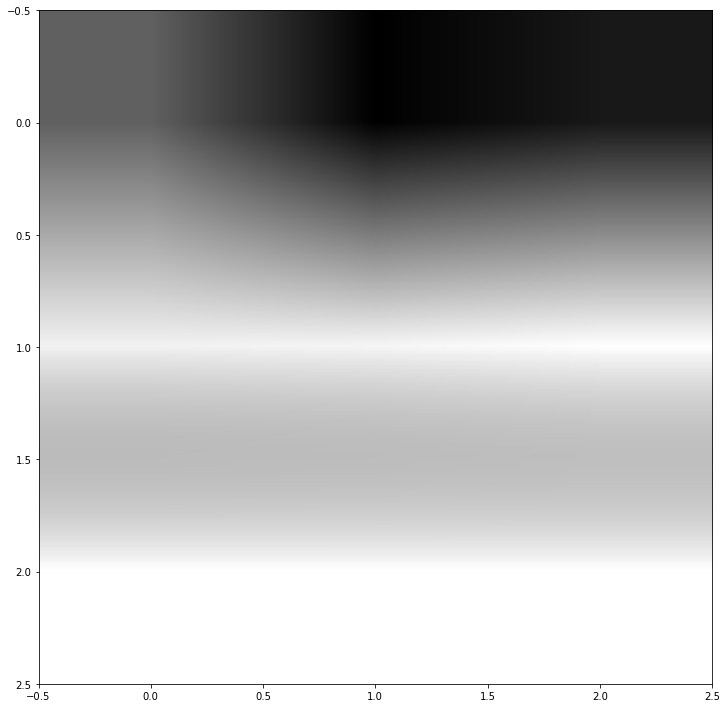

In [188]:
dl.scenes.display(arr)

In [ ]:
scene = scenes[-1]
ctx_lowres = ctx.assign(resolution=60)
arr = scene.ndarray("red green blue", ctx_lowres)
dl.scenes.display(arr)


In [68]:
highres_context = ctx.assign(resolution=120)
arr_stack = scenes.stack(" ".join(soil_m["bands"]), highres_context)
composite = np.ma.median(arr_stack, axis=0)
dl.scenes.display(composite, title="Región Metropolitana")

BadRequestError: Error with request:
{"message":"Output width or height is less than 1 pixel: width=0.5016614262660027 height=0.5015044233799656","status_code":400}

For reference, dl.Raster.ndarray was called with these arguments:
{
  "inputs": "smap:SMPL3SM_E:SMAP_L3_SM_P_E_20150408_R16020_001-soil_moisture-east-v2",
  "order": "gdal",
  "bands": [
    "am_soil_moisture",
    "pm_soil_moisture"
  ],
  "scales": null,
  "data_type": "Float32",
  "resampler": "near",
  "processing_level": null,
  "cutline": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          93.84161442403983,
          25.67553403747568
        ],
        [
          94.04098557596016,
          25.67553403747568
        ],
        [
          94.04098557596016,
          25.856064843071547
        ],
        [
          93.84161442403983,
          25.856064843071547
        ],
        [
          93.84161442403983,
          25.67553403747568
        ]
      ]
    ]
  },
  "resolution": 120,
  "srs": "+proj=longlat +datum=WGS84 +no_defs ",
  "bounds_srs": "EPSG:4326",
  "align_pixels": true,
  "bounds": [
    93.84161442403983,
    25.67553403747568,
    94.04098557596016,
    25.856064843071547
  ],
  "dimensions": null
}

In [6]:
remas = ReMasFrame()

In [7]:
prod = remas.get_products()

In [8]:
goes = prod["weather"]["goes"]

In [10]:
goes["id"]

'goes17:fulldisk:v1'

In [18]:
help(remas.create_box)

Help on method create_box in module src.ReMasFrame:

create_box(km, inplace=False) method of src.ReMasFrame.ReMasFrame instance



In [17]:
remas2 = remas.create_box(10)

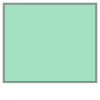

In [19]:
remas2[0]

In [11]:
help(remas.search_scenes)

Help on function search_scenes in module src.ReMasFrame:

search_scenes(polygons, product_ids, mid_date=None, date_range=None, start_date=None, end_date=None, limit=10)
    Search scenes from the dataframe between an interval of dates.
    
    Arguments:
    ---------
        product_ids : list
            product ids, e.g. ["landsat:LC08:PRE:TOAR"]
        
        mid_date : str
            date to create an interval around. Ignored if start/end_date is given.
        
        date_range : int
            size of one half of the interval. Ignored if start/end_date is given.
    
        start_date, end_date : int, int. Optional
            start and end date of an interval.
        
        limit : int 
            maximum number of images
    
    Returns:
    -------
    scenes : ndarray
        Result from Descarteslabs
    
    ctx : context 
        Result from Descarteslabs



In [20]:
remas.search_scenes(polygons=remas2.geometry.values[0],
                    product_ids=[goes["id"]])

(SceneCollection of 0 scenes,
 AOI(geometry=<shapely.geom...x7f787d70bf50>,
     resolution=None,
     crs=None,
     align_pixels=True,
     bounds=(107.34351703986678, 32.472325344123774, 107.55648296013322, 32.652673360485856),
     bounds_crs='EPSG:4326',
     shape=None))

In [12]:
remas.search_scenes([goes["id"]],
                    mid_date="2013-09-01",
                    10,
                    1)

NameError: name 'date_interval' is not defined

In [ ]:
ids = [dictic[prod]["id"] for prod in dictic]